In [1]:
import pandas as pd
Iris = pd.read_csv('Iris.csv')
Iris

Id  Sepal_length  Sepal_width  Petal_length  Petal_width         Species
0      1           5.1          3.5           1.4          0.2     Iris-setosa
1      2           4.9          3.0           1.4          0.2     Iris-setosa
2      3           4.7          3.2           1.3          0.2     Iris-setosa
3      4           4.6          3.1           1.5          0.2     Iris-setosa
4      5           5.0          3.6           1.4          0.2     Iris-setosa
..   ...           ...          ...           ...          ...             ...
145  146           6.7          3.0           5.2          2.3  Iris-virginica
146  147           6.3          2.5           5.0          1.9  Iris-virginica
147  148           6.5          3.0           5.2          2.0  Iris-virginica
148  149           6.2          3.4           5.4          2.3  Iris-virginica
149  150           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 6 columns]

In [2]:
Iris = Iris.drop_duplicates()
Iris.reset_index(drop=True)
s = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
Iris['Species'] = Iris['Species'].map(s)
Iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal_length  150 non-null    float64
 2   Sepal_width   150 non-null    float64
 3   Petal_length  150 non-null    float64
 4   Petal_width   150 non-null    float64
 5   Species       150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 8.2 KB


In [3]:
Iris.head()

Id  Sepal_length  Sepal_width  Petal_length  Petal_width  Species
0   1           5.1          3.5           1.4          0.2        0
1   2           4.9          3.0           1.4          0.2        0
2   3           4.7          3.2           1.3          0.2        0
3   4           4.6          3.1           1.5          0.2        0
4   5           5.0          3.6           1.4          0.2        0

In [4]:
#設定特徵值 不用標籤
from sklearn.cluster import KMeans
Iris_X = Iris[['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']]

In [5]:
#建立K-平均法模型
k = 3
km = KMeans(n_clusters = k)

In [6]:
#訓練
km.fit(Iris_X)

KMeans(n_clusters=3)

In [7]:
km.inertia_

78.94084142614601

In [8]:
s = []
for k in range(1,15):
  km = KMeans(n_clusters=k)
  km.fit(Iris_X)
  s.append(km.inertia_)
print(s)

C:\Users\wumin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.317873214285726, 46.535582051282034, 38.93873974358975, 34.190687924796634, 30.317114331723044, 28.056776096428916, 26.44370454545456, 25.022291416076584, 22.607838744588747, 21.30755555555556, 19.86586507936508]


<AxesSubplot:>

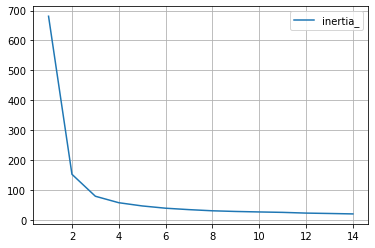

In [9]:
Iris_kmeans = pd.DataFrame()
Iris_kmeans['inertia_'] = s
Iris_kmeans.index = list(range(1,15))
Iris_kmeans.plot(grid=True)

In [10]:
k = 3
km = KMeans(n_clusters=k)
km.fit(Iris_X)

KMeans(n_clusters=3)

In [11]:
#以測試集進行預測
print('分群的預測結果:')
pred = km.fit_predict(Iris_X)
pred

分群的預測結果:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

<AxesSubplot:xlabel='Petal_width', ylabel='Petal_length'>

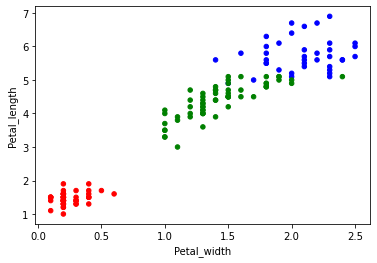

In [12]:
#進行分群預測
Iris_1 = Iris_X.copy()
Iris_1['pred'] = pred
c = {0:'r', 1:'g', 2:'b'}
Iris_1['colors'] = Iris_1['pred'].map(c)
Iris_1.plot(kind='scatter', x='Petal_width', y='Petal_length', c=Iris_1['colors'])

In [13]:
#進行分群預測
Iris_1 = Iris_X.copy()
Iris_1['pred'] = pred
c = {0:'r', 1:'g', 2:'b'}
Iris_1['colors'] = Iris_1['pred'].map(c)
Iris_1.plot(kind='scatter', x='Sepal_length', y='Sepal_width', c=Iris_1['colors'])

<AxesSubplot:xlabel='Sepal_length', ylabel='Sepal_width'>

In [14]:
new = [[6.6,3.1,5.2,2.4]]
v = km.predict(new)
print('預測結果為:', v)

預測結果為: [2]
